# Assignment 3
# Name: Sha Liu

## Section 1: friendships network

### Read the text file and create a network

In [2]:
import networkx as nx
%matplotlib inline

In [3]:
G = nx.read_graphml('data/highschool_2012.graphml')

### 1. Which node in this network has the highest degree?

In [4]:
highest_degree_node = max(G.nodes, key = G.degree)
print("The node has the highest degree is", highest_degree_node)

The node has the highest degree is 826


### 2. Which node has the largest clustering coefficient?

In [5]:
clustering_coe = nx.clustering(G)
highest_clustering_node = max(G.nodes, key = clustering_coe.get)
print("The node has the highest clustering coefficient is", highest_clustering_node)

The node has the highest clustering coefficient is 647


### 3. What is the average clustering coefficient of the network?

In [6]:
nx.average_clustering(G)

0.47520352183217995

### 4. Each node in this graph has a 'gender' attribute. Let's investigate and see if high school students are homophilous with respect to gender. To find out the gender of any node type, you could use: G.nodes[node]['gender'] where node indicates the label of the node. The answer will be  'M' (male) or 'F' (female). What proportion of the nodes in the graph are male?

In [7]:
def male_percent(G):
    Male = 0
    for node in G.nodes:
        if G.nodes[node]['gender'] == 'M':
            Male += 1
    return Male/G.number_of_nodes()

print("Male proportion is", male_percent(G))

Male proportion is 0.7333333333333333


### 5. Now let's compute the expected number of edges in the null model where gender has no effect on edge creation. In a random network with the same number of edges and the same proportion of male and female nodes, how many M-M edges would we expect? Round to the nearest integer. 
Hint: This and the next two answers should just about sum to the total number of edges (may be off by one or so due to rounding errors).

In [8]:
int(round((male_percent(G)**2) * G.number_of_edges()))

1194

### 6. How many F-F edges would we expect? (round to nearest integer)

In [9]:
int(round(((1-male_percent(G))**2) * G.number_of_edges()))

158

### 7. And how many F-M edges would we expect? (round to nearest integer)

In [10]:
int(round(((1-male_percent(G))* male_percent(G) *2 * G.number_of_edges())))

868

### 8. Now let's count the actual number of edges of each type. How many edges in this graph connect two nodes with 'M' as their 'gender' attribute?

In [11]:
def M_M_edges(G):
    count = 0
    for u, v in G.edges:
        if G.nodes[u]['gender'] == 'M'and G.nodes[v]['gender'] == 'M':
                count += 1
    return count

print("M-M edges", M_M_edges(G))

M-M edges 1276


### 9. How many edges connect two nodes with 'F' as their 'gender' attribute?

In [12]:
def F_F_edges(G):
    count = 0
    for u, v in G.edges:
        if G.nodes[u]['gender'] == 'F'and G.nodes[v]['gender'] == 'F':
                count += 1
    return count

print("F-F edges", F_F_edges(G))

F-F edges 182


### 10. How many edges then connect nodes of different gender?

In [15]:
def F_M_edges(G):
    count = 0
    for u, v in G.edges:
        if G.nodes[u]['gender'] == 'F'and G.nodes[v]['gender'] == 'M':
                count += 1
    return count

def M_F_edges(G):
    count = 0
    for u, v in G.edges:
        if G.nodes[u]['gender'] == 'M'and G.nodes[v]['gender'] == 'F':
                count += 1
    return count

print("F-M edges", F_M_edges(G) + M_F_edges(G))

F-M edges 762


### 11. Given these counts as compared to the expected values, would you consider this evidence for or against a homophily bias in friendship relations among these highschoolers? Answer either For or Against.


As the actual number of cross-gender edges is significantly less than 2pq as 762 is less than 868, then there is evidence for homophily

## Section 2: club membership network

Name: 
Type: Graph
Number of nodes: 40
Number of edges: 95
Average degree:   4.7500


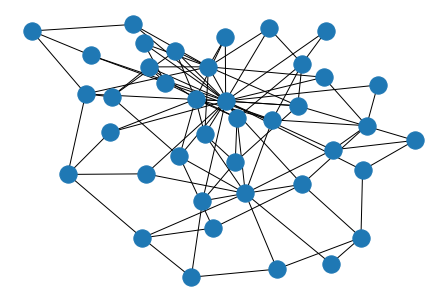

In [17]:
B = nx.read_edgelist('data/club_membership.edgelist')
print(nx.info(B))
nx.draw(B)

### 1. What is the mean number of organizational affiliations per person in the data set?

In [14]:
import statistics
a = []
for n in B.nodes():
    if n[0]=="p":
        count = 0
        affiliations = B.neighbors(n)
        for n in affiliations:
            if n[0]=="o":
                count += 1
        a.append(count)
print('Mean number of organizational affiliations per person:', statistics.mean(a))

Mean number of organizational affiliations per person: 3.8


### 2. What is the mean number of members per organization?

In [15]:
b = []
for n in B.nodes():
    if n[0]=="o":
        count = 0
        affiliations = B.neighbors(n)
        for n in affiliations:
            if n[0]=="p":
                count += 1
        b.append(count)
print('Mean number of members per organization:', statistics.mean(b))

Mean number of members per organization: 6.333333333333333


### 3. Please define a similarity measure for two nodes in a graph based on how many neighbors they have in common divided by the total number of all neighbors (don't overcount common neighbors ) of the two nodes.
Implement this similarity measure as a function that takes as arguments the graph and two nodes from the same "side" of the bipartite graph (i.e. two people or two organizations). Use set algebra to compute the similarity of their neighborhoods. In the tutorial 1 exercise 3Links to an external site., we have written a function that can help. The similarity function should return a value between 0 and 1.

In [16]:
def similarity(B, node_1, node_2):
    common_neighbors = set(B.neighbors(node_1)).intersection(set(B.neighbors(node_2)))
    total_neighbors = set(B.neighbors(node_1)).union(set(B.neighbors(node_2)))
    return (node_1, node_2, len(common_neighbors)/len(total_neighbors))

### 4. Which pair of people has the highest similarity?

In [17]:
from itertools import combinations
people = [n for n in B.nodes() if n[0]=='p'] 
pair_jaccard = [similarity(B, pair[0], pair[1]) for pair in combinations(people, 2)]
max_jaccard_pairs = max(pair_jaccard, key=lambda x: x[2])
max_jaccard_pairs

('p22', 'p14', 0.8)

### 5. What is the similarity value for this pair of people?

In [18]:
max_jaccard_pairs[2]

0.8

### 6. Which pair of organizations has the most similar membership?

In [19]:
from itertools import combinations
org = [n for n in B.nodes() if n[0]=='o']
pair_jaccard = [similarity(B, pair[0], pair[1]) for pair in combinations(org, 2)]
max_jaccard_pairs = max(pair_jaccard, key=lambda x: x[2])
max_jaccard_pairs

('o1', 'o5', 0.5238095238095238)

### 7. What is the similarity value for that pair of organizations?


In [20]:
max_jaccard_pairs[2]

0.5238095238095238